# Asignatura: INTELIGENCIA ARTIFICIAL APLICADA A INTERNET DE LAS COSAS
#### Práctica 0 : Python
#### Integrantes del grupo 1: Pablo Cayo Alcalde Montes de Oca, Alejandro de Celis Domínguez, Diego Pellicer Lafuente

<br>

En esta memoria incluímos el desarrollo realizado para dar respuesta al problema explicado en el siguiente enunciado.

## 1. Enunciado

<b> En esta primera práctica has de implementar un algoritmo de integración numérica basado en el método de Monte Carlo.

<b> Dada una función real e integrable de una sola variable f(x), y su integral F(x), la integral definida de f(x) entre a y b viene dada por la expresión

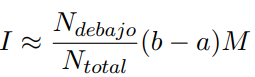

<b> como el cálculo simbólico de la integral F(x) puede ser muy difícil, se utilizan métodos numéricos que aproximan su valor utilizando la interpretación geométrica de la integral definida que se corresponde con el área bajo la curva f(x) entre a y b.

<b> Dada una función f(x) positiva en el intervalo x 2 [a; b] cuyo valor máximo es M dentro de ese intervalo, podemos definir un rectángulo de área (b  a) ⇥ M como el que se muestra en la figura para el intervalo [0; 2]. El método de Monte Carlo para el cálculo de la integral consiste en generar aleatoriamente puntos (en rojo en la figura) dentro de ese rectángulo y aproximar el valor de la integral por el porcentaje de puntos que caen por debajo de la función en cuestión:

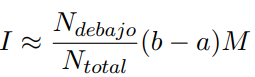

<b> donde Ndebajo es el número de puntos (x, y) generados aleatoriamente cuya coordenada y es menor que el valor de la función f(x) para ese valor de x y Ntotal es el número total de puntos generados aleatoriamente dentro del rectángulo.

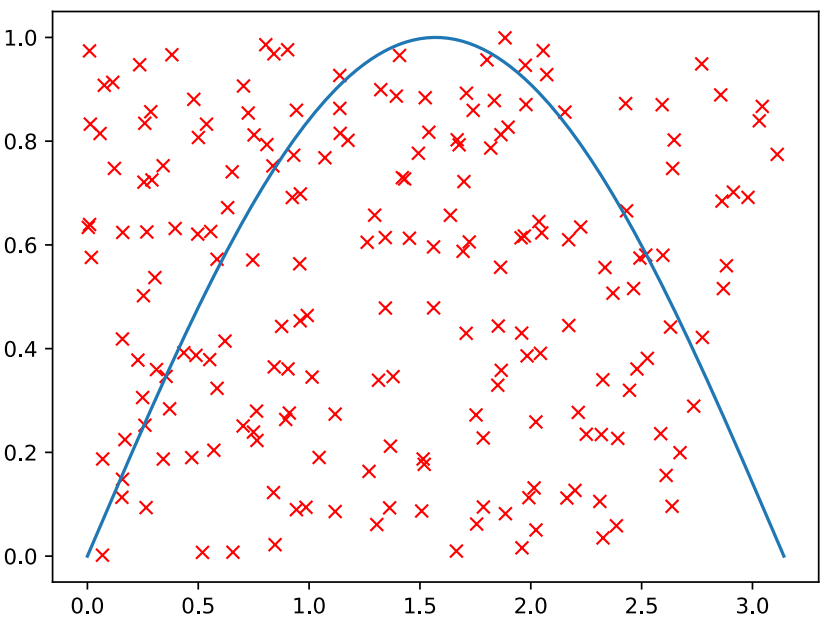

<br>

<b> Implementa en Python una función con la siguiente cabecera 

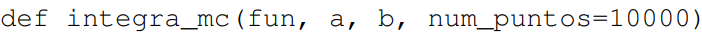

<b> que calcule la integral de fun entre a y b por el método de Monte Carlo antes descrito, generando para ello num_puntos aleatoriamente. Puedes comprobar la corrección del resultado obtenido, comparándolo con el de aplicar la función scipy.integrate.quad de Python.

<b> Debes implementar dos versiones del algoritmo, una iterativa que realice num_puntos iteraciones para calcular el resultado, y otra que utilice operaciones entre vectores en lugar de bucles, comparando los tiempos de ejecución obtenidos con ambas versiones. </b>


------------------------------------------------------

## 2. Desarrollo de la práctrica 
Siguiendo las indicaciones del guión de prácticas, se han desarrollado dos versiones de la función integrac_mc.

En nuestro código, la función "integra_mc" se corresponde con la versión de operaciones entre bucles, mientras que la versión "np_integra_mc" es la que implementa las operaciones entre vectores.

Comenzamos con la ejecución de la versión de operaciones entre bucles. Como parámetros utilizaos los siguientes:
- Función: utilizamos una integral de un polinomio de grado 2. ![alt text](image.png)
- cotas a y b: utilizamos a = 0 y b = 1.
- Número de puntos a generar aleatoriaente: los indicados en el guión de la práctica: 10000.


### 2.1 Código desarrollado para la práctica
Hemos desarrollado el siguiente fragmento de código, que incluye lo siguiente:
- Aplicación del método de Monte Carlo, versión iterativa y versión vectorizada.
- Cáluclo del tiempo de ejecución de cada versión de la función.
- Comparación de los valores obtenidos con el generado por la función squad.
- Representación gráfica de la función sin(X) y del área calculada por la integral en cuestión.

El valor de la integral calculado mediante la versión iterativa es de:  0.8201701659532303
El valor de la integral calculado mediante la versión vectorizada es de:  0.22217102877267902
El tiempo de ejecución de la versión iterativa fue de:  0.11481809616088867
El tiempo de ejecución de la versión vectorizada fue de:  0.007592678070068359
La diferencia de tiempo entre ambas versiones es de:  0.10722541809082031
La diferencia entre el valor obtenido por la versión iterativa y el valor real es de:  0.013163167380103036
La diferencia entre el valor obtenido por la versión vectorizada y el valor real es de:  0.6111623045606543


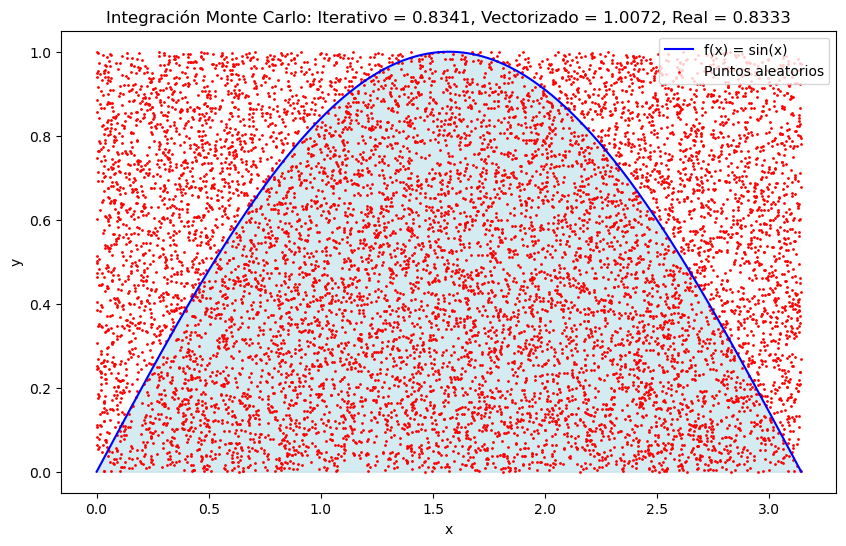

In [42]:
from random import uniform ##Se importa la librería random para utilizar la función uniform que genera un número aleatorio dentro de un intervalo dado
from typing import Callable ##Se importa la librería typing para definir el tipo de las funciones utilizadas en el cálculo de la integral
from scipy import integrate ##se importa la libreria de scipy para utilizar la función quad
import numpy as np ##Se importa la librería numpy para utilizar la función np.random.uniform
import time ##Se importa la librería time para medir el tiempo de ejecución de ambas versiones
import matplotlib.pyplot as plt ##Se importa la librería matplotlib.pyplot para visualizar la función f(x) = sin(x) y los puntos aleatorios generados en el intervalo [0,pi]
##import monte_carlo ##Se importa el módulo monte_carlo que contiene las funciones integra_mc y np_integra_mc en C. Se debe compilar el módulo monte_carlo con el comando python3 setup.py build_ext --inplace para poder importarlo


num_puntos = 10000 ##Se define el número de puntos a generar para el cálculo de la integral mediante el método de Monte Carlo

##Se define la función integra_mc que calcula la integral de una función dada mediante el método de Monte Carlo - versión iterativa

def integra_mc(fun: Callable[[float],float], a: float, b :float, num_puntos) -> float:
    ys = [fun(uniform(a,b)) for i in range(num_puntos)] ##Se genera una lista de valores de la función fun(x) para un número de puntos dado. Se utiliza la función uniform(a,b) para generar un número aleatorio dentro del intervalo [a,b]
    ymax = max(ys) ##Se calcula el valor máximo de la lista ys de valores de la función fun(x)
    count = sum(uniform(0,ymax) < y for y in ys) ##Se cuentan los valores de la lista ys que son menores que un número aleatorio generado dentro del intervalo [0,ymax]. Se utiliza la función sum(uniform(0,ymax) < y for y in ys) para contar los valores de la lista ys que son menores que un número aleatorio generado dentro del intervalo [0,ymax]
    area = (b - a) * ymax * count / num_puntos ##Se calcula el área bajo la curva de la función fun(x) en el intervalo [a,b] mediante el método de Monte Carlo y se almacena en la variable area
    return area 

##Se define la función np_integra_mc que calcula la integral de una función dada mediante el método de Monte Carlo - versión vectorial

def np_integra_mc(fun: Callable[[float],float], a: float, b :float, num_puntos) -> float:
    xs = np.random.uniform(a, b, num_puntos) ##Se genera un array de valores del eje x aleatorios dentro del intervalo [a,b]. Se utiliza la función np.random.uniform(a, b, num_puntos) para generar un array de valores aleatorios del eje x dentro del intervalo [a,b] con un número de puntos dado num_puntos
    try: ##Se intenta calcular un array de valores de la función fun(x) para cada valor del array xs. Se utiliza la función fun(xs) para calcular los valores de la función fun(x) para cada valor del array xs y se almacenan en la variable ys. Si la función fun(xs) no es válida, se utiliza la función np.vectorize para calcular los valores de la función fun(x) para cada valor del array xs y se almacenan en la variable ys
        ys = fun(xs) ##Se calcula un array de valores de la función fun(x) para cada valor del array xs. Se utiliza la función fun(xs) para calcular los valores de la función fun(x) para cada valor del array xs y se almacenan en la variable ys 
    except: ##Si la función fun(xs) no es válida, se utiliza la función np.vectorize para calcular los valores de la función fun(x) para cada valor del array xs y se almacenan en la variable ys 
        vfun = np.vectorize(fun)  ##Se utiliza la función np.vectorize para calcular los valores de la función fun(x) para cada valor del array xs y se almacenan en la variable ys 
        ys = vfun(xs) ##Se calcula un array de valores de la función fun(x) para cada valor del array xs. Se utiliza la función np.vectorize(fun) para calcular los valores de la función fun(x) para cada valor del array xs y se almacenan en la variable ys 
    ymax = np.max(ys) ##Se calcula el valor máximo del array ys de valores de la función fun(x) 
    count = (ys > np.random.uniform(0, ymax)).sum() ##Se cuentan los valores del array ys que son mayores que un número aleatorio generado dentro del intervalo [0,ymax]. Se utiliza la función (ys > np.random.uniform(0, ymax)).sum() para contar los valores del array ys que son mayores que un número aleatorio generado dentro del intervalo [0,ymax] 
    area = (b - a) * ymax * count / num_puntos ##Se calcula el área bajo la curva de la función fun(x) en el intervalo [a,b] mediante el método de Monte Carlo y se almacena en la variable area 
    return area

start_time = time.time() ##Se almacena el tiempo de inicio de la ejecución de la versión iterativa en la variable start_time
valor_integra_mc = integra_mc(lambda x: x **2 + 1 if x > .5 else x**2, 0, 1, num_puntos) ##Se calcula el valor de la integral de la función f(x) = x **2 + 1 si x > .5, x**2 si x <= .5 en el intervalo [0,1] mediante la función integra_mc definida anteriormente y se almacena en la variable valor_integra_mc 
iterative_time = time.time() - start_time ##Se calcula el tiempo de ejecución de la versión iterativa y se almacena en la variable iterative_time 

start_time = time.time() ##Se almacena el tiempo de inicio de la ejecución de la versión vectorizada en la variable start_time
valor_np_integra_mc = np_integra_mc(lambda x: x **2 + 1 if x > .5 else x**2, 0, 1, num_puntos) ##Se calcula el valor de la integral de la función f(x) = x **2 + 1 si x > .5, x**2 si x <= .5 en el intervalo [0,1] mediante la función np_integra_mc definida anteriormente y se almacena en la variable valor_np_integra_mc 
vectorized_time = time.time() - start_time


##Imprimimos el valor de la integral obtenido por ambas versiones de la función integra_mc y la diferencia entre ellas 
print("El valor de la integral calculado mediante la versión iterativa es de: ", valor_integra_mc)
print("El valor de la integral calculado mediante la versión vectorizada es de: ", valor_np_integra_mc)

##Imprimimos el tiempo de ejecución de ambas versiones y la diferencia entre ellas
print("El tiempo de ejecución de la versión iterativa fue de: ", iterative_time)
print("El tiempo de ejecución de la versión vectorizada fue de: ", vectorized_time)
print("La diferencia de tiempo entre ambas versiones es de: ", iterative_time - vectorized_time)

##Calculamos la diferencia entre el valor obtenido por ambas versiones y el valor real, obtenido con la función quad de scipy

valor_quad = integrate.quad(lambda x: x **2 + 1 if x > .5 else x**2, 0, 1) ##Se calcula el valor real de la integral de la función f(x) = x **2 + 1 si x > .5, x**2 si x <= .5 en el intervalo [0,1] mediante la función quad de scipy

diferencia_mc = abs(valor_integra_mc - valor_quad[0]) ##Se calcula la diferencia entre el valor obtenido por la versión iterativa y el valor real
diferencia_np = abs(valor_np_integra_mc - valor_quad[0]) ##Se calcula la diferencia entre el valor obtenido por la versión vectorizada y el valor real

##Imprimimos la diferencia entre el valor obtenido por ambas versiones y el valor real
print("La diferencia entre el valor obtenido por la versión iterativa y el valor real es de: ", diferencia_mc)
print("La diferencia entre el valor obtenido por la versión vectorizada y el valor real es de: ", diferencia_np)

##Visualización gráfica de la función f(x) = sin(x) y los puntos aleatorios generados en el intervalo [0,pi], incluyendo el valor de la integral obtenido por ambas versiones y el valor real obtenido con la función quad de scipy
def fun(x):
    return np.sin(x) ##Se define la función f(x) = sin(x)

a = 0
b = np.pi

# Visualización gráfica
x_curve = np.linspace(a, b, 1000)
y_curve = fun(x_curve)


## Generar puntos para la visualización
x_iter = [uniform(a, b) for _ in range(num_puntos)] ##Genera una lista de valores dl eje x aleatorios dentro del intervalo [a,b]. Se utiliza la función uniform de la librería random para generar un número aleatorio dentro del intervalo [a y b]
y_iter = [uniform(0, max(y_curve)) for _ in range(num_puntos)] ##Genera una lista de valores dl eje y aleatorios dentro del intervalo [0 y el máximo de la función max(y_curve)]. Se utiliza la función uniform (0,max(y_curve)) para generar un número aleatorio dentro del intervalo [0 y el máximo de la función max(y_curve)], siendo max(y_curve) el valor máximo de la función fun(x) en el intervalo [a,b]
y_fun_iter = [fun(xi) for xi in x_iter] ##Calcular los valores de la función fun(x) para cada valor incluido en la list x_iter. [fun(xi) for xi in x_iter] aplica la función fun a cada elemento xi de la lista x_iter y almacena los resultados en una lista y_fun_iter.

plt.figure(figsize=(10, 6))
plt.plot(x_curve, y_curve, label='f(x) = sin(x)', color='blue') ##Se grafica la función f(x) = sin(x) en el intervalo [a,b]
plt.fill_between(x_curve, y_curve, color='lightblue', alpha=0.5) ##Se rellena el área bajo la curva de la función f(x) = sin(x) en el intervalo [a,b]

plt.scatter(x_iter, y_iter, s=1, color='red', label='Puntos aleatorios') ##Se grafican los puntos aleatorios generados en el intervalo [a,b]
plt.title(f"Integración Monte Carlo: Iterativo = {integral_mc_iterativo:.4f}, Vectorizado = {integral_mc_vectorizado:.4f}, Real = {valor_quad[0]:.4f}") ##Se muestra el valor de la integral obtenido por ambas versiones y el valor real obtenido con la función quad de scipy
plt.legend() ##Se añade la leyenda definida anteriormente a la gráfica
plt.xlabel('x') ##Se añade la etiqueta x al eje x
plt.ylabel('y') ##Se añade la etiqueta y al eje y
plt.show() ##Se muestra la gráfica generada


### 2.2 Análisis de los resultados y conclusiones

Podemos ver que, utilizando la funcio quad y su resultado como referencia, la función que hemos desarrollado y que más se aproxima a este resultado es "integra_mc" (operaciones entre bucles), pese a ser la menos óptima en tiempo de ejecución.

La gráfica generada muestra el área calculada.

La versión iterativa es más precisa que la versión vectorial, ya que ésta genera y evalúa los puntos individualmente; mientras que la versión vectorial genera todos los puntos de una sola vez. Esto es más eficiente en tiempo de ejecución, pero puede añadir impresiciones a raíz de la manipulación en bloque de los puntos generados. 

Con respecto a la estimación del valor máximo, en la versión iterativa esto puede ser más precisa si se hace un ajuste manualmente para cada punto generado. Sobre la versión vectorial, se realiza una estimación inicial del valor máximo, que podría no ser tan precisa, afectando a la precisión final de la integral.

Sobre los errores de redondeo, la versión vectorial puede introducir errores de redondeo acumulativos al generarse los datos por bloque, mientras que en la versión iterativa esto se puede manejar de forma más sencilla, ya que cada punto se procesa manualmente.

Hablando de la aleatoriedad, la versión iterativa se puede beneficiar de la distribución aleatoria de los puntos de manera más uniforme. Para el vectorial, la generación simultánea de todos los puntos puede resultar en una menor uniformidad en la distribución aleatoria de los puntos, afectando a la precisión. 

En resumen, el algoritmo iterativo del método de Monte Carlo puede proporcionar resultados más precisos debido a un control más fino sobre el muestreo, la estimación del valor máximo, la gestión de errores de redondeo y la uniformidad en la distribución aleatoria de los puntos. Sin embargo, ambos métodos pueden ser útiles dependiendo del contexto y las necesidades específicas de precisión y eficiencia.